In [1]:
MAC=False
if MAC: 
    rootf = '/Users'
else:
    rootf = '/home'

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# %load_ext autotime

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os as os
import sys
sys.path.append('./extraction_functions') #this is where we put all the functions.py
sys.path.append('./../../functions_PVA') #this is where we put all the functions.py
#from brpylib import *

import matplotlib.pyplot as plt
from numpy               import arange


from extract_triggers import *

from save_load import *

# Load raw file to extract triggers

In [5]:
rawfiles = []
rawnames = []
rawcount=0

rawdir ='/mnt/usb-Seagate_Basic_NABCT3TJ-0:0-part2/DATA_FIX/RAW_unfiltered/'

#-----------------------------------------------
# Here I load all the pickles names
# we make the list of names, and the list of address to open
#-----------------------------------------------
rawfilesdata = getfiles(startdir=rawdir, phrase='.raw', function='endswith')
for rf in rawfilesdata:
    rawfiles.append(rf)

rawfiles = sorted(rawfiles)

for rf in rawfiles[:]:
    rawnames.append(((rf.split('/')[-1].split('-')[0:2])))

rawcount = len(rawfiles)
print(rawnames)   
rawfiles
np.where(np.array(rawnames)=='exp4')[0]
rawfiles

[['exp24', 'meas_01.raw'], ['exp24', 'meas_02.raw'], ['exp24', 'meas_03.raw'], ['exp24', 'meas_04.raw'], ['exp24', 'meas_05.raw'], ['exp24', 'meas_06.raw']]


['/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_01.raw',
 '/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_02.raw',
 '/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_03.raw',
 '/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_04.raw',
 '/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_05.raw',
 '/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_06.raw']

In [6]:
exp = '24'
nfiles = 6

meas_skip=[]    # do only measurement N
SKIP= False

fs=20000

MEA = 2                  # select MEA

Nchannels  = 256              #256 for standard MEA, 17 for MEA1 Polychrome
channel_id = 126              #126 for standard MEA, 1 for MEA1 Polycrhome


if MEA==1: threshold  = 270e+3         # 270e+3 for MEA1, 50e+3 for MEA2, -3.14470e+5 for MEA1 Polycrhome
if MEA==2: threshold  = 50e+3          

rootF = rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/'
Fsave = rootF

indexes = np.where(np.array(rawnames)=='exp'+str(exp))[0]
mcount=0
for meas in indexes[:]:
    mcount+=1
    
    #----------------------
    if SKIP:
        if mcount in meas_skip: continue
    #----------------------
    print(mcount)
    f_base = rawfiles[meas]
    print(f_base)
    f_out = rootF + 'exp'+str(exp)+'-meas_0' + str(mcount) + '_triggers_unfilt'
    print(f_out)
    indices,data, t_tot =  extract(input_path=f_base , dtype='uint16', nb_channels=Nchannels, channel_id=channel_id, output_path=None,threshold =threshold)
    
    print(len(indices),mean(indices))

    save_obj([indices,t_tot],f_out )
    save_obj(data,f_out+'_data')

print('Done!')

  0%|          | 28297/61538000 [00:00<03:40, 279160.54it/s]

1
/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_01.raw
/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/exp24-meas_01_triggers_unfilt


  0%|          | 0/15998000 [00:00<?, ?it/s]

91802 30909493.5501732
2
/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_02.raw
/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/exp24-meas_02_triggers_unfilt


  0%|          | 17665/8370000 [00:00<00:47, 176196.06it/s]

32400 6794150.436450617
3
/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_03.raw
/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/exp24-meas_03_triggers_unfilt


  0%|          | 27635/99604000 [00:00<06:00, 276348.29it/s]

19200 4244032.941458333
4
/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_04.raw
/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/exp24-meas_04_triggers_unfilt


100%|██████████| 99604000/99604000 [04:19<00:00, 383397.44it/s]


198000 49794138.383040406


  0%|          | 30398/100176000 [00:00<05:29, 303969.42it/s]

5
/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_05.raw
/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/exp24-meas_05_triggers_unfilt


100%|██████████| 100176000/100176000 [04:25<00:00, 376707.77it/s]


194400 50902717.595349796


  0%|          | 28673/98868000 [00:00<05:44, 286631.18it/s]

6
/media/matias/data/DATA_pert/sorted/exp24/exp24-meas_06.raw
/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/exp24-meas_06_triggers_unfilt


100%|██████████| 98868000/98868000 [04:27<00:00, 369854.74it/s]


194400 49140621.08658436
Done!


# Run Sanity Check

In [14]:
exp=24
nmeas=6

meas_skip=[3]    # do only measurement N
SKIP= False

rootF = rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/'

for meas in np.arange(nmeas)+1:
    #----------------------
    if SKIP:
        if meas in meas_skip: continue
    #----------------------
    
    print('Measurement ', meas)
    
    f=rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt'# +'_TEST'

    indices, ttot = load_obj(f)
    indices.shape,ttot
    run_minimal_sanity_check(indices[:])
    # indices
    indices.shape

Measurement  1
Minimal sanity check ok.
Measurement  2
Minimal sanity check ok.
Measurement  3


UserWarning: Triggers are not evenly spaced (some missing?).

In [92]:
#/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA
rootF = rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/'

f_out = rootF + 'exp'+str(exp)+'-meas_0' + str(mcount) + '_triggers_unfilt'# +'_TEST'
# save_obj([indices,t_tot],f_out)
# save_obj(data,f_out+'_data')

# Plot Data in case sanity check fails to correct it

### Indices

In [16]:
# Get indices
exp=24
meas=3

rootF = rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_triggers/'
f=rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt' 

indices, ttot = load_obj(f)
indices.shape,ttot

((19200,), 418.5)

19200

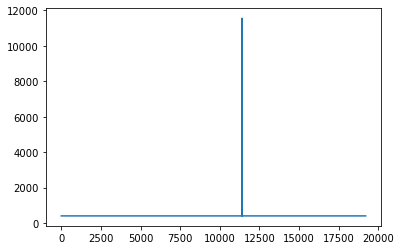

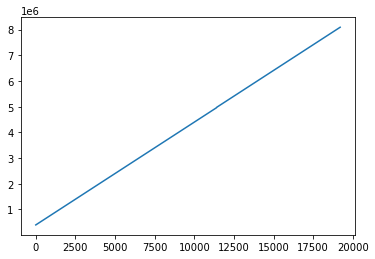

In [18]:
# Plot

# plot(diff(indices)[0:450000])
# print(np.where(diff(indices)>2000))
# print(diff(indices)[138300:138500])

figure()
plot(diff(indices)[:])
indices
diff(indices)
indices[0]
len(indices)

figure()
plot(indices)
len(indices)

### Raw traces

In [164]:
# Get raw traces
exp=4
meas=2

f=rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/data_SS/pckls_triggers/exp'+str(exp)+'-meas_0'+str(meas)+'_triggers_unfilt_data'
indices2 = load_obj(f)
indices2.shape

(39168000,)

8000000


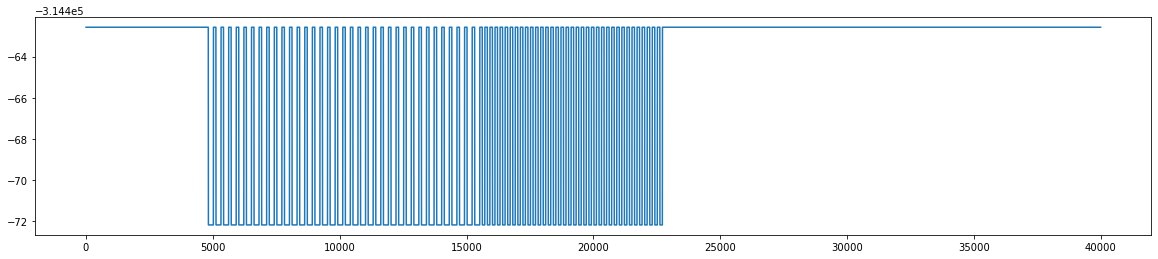

In [166]:
# Plot
figure(figsize=(20,4))
shift=0

fs=20000#20000

x0=18*fs          #0*500 #+ int(0.5*1e+6) + 150000

plt.plot(indices2[x0+shift:x0+fs*2+shift])
# plt.plot(indices2[-fs*300+shift:])
print(16000*500)
# xlim([1e6*0.5,1e6*3])

8000000


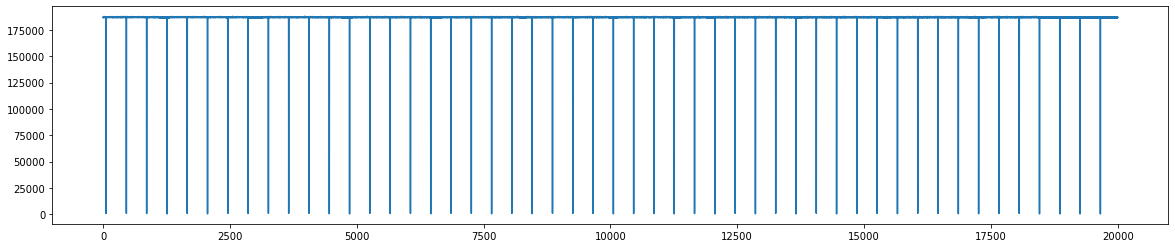

In [44]:
# Plot
figure(figsize=(20,4))
shift=0
fs=20000#20000
x0=20*fs#0*500 #+ int(0.5*1e+6) + 150000
plt.plot(indices2[x0+shift:x0+fs*1+shift])
print(16000*500)
#xlim([1e6*0.5,1e6*3])

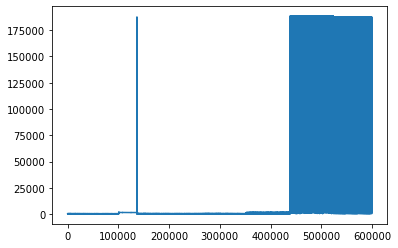

In [120]:
fs=20000
x0=0
plt.plot(indices2[x0:x0+fs*30])
#print(16000*500)